In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.random import random, uniform, randint
import numba
import os, tqdm

In [10]:
@numba.njit
def S_matrix(N):
    return 2 * (uniform(-1, 1, (N,N)) > 0.0) -1


In [11]:
@numba.njit
def calc_hamil(S):
    p_e = 0
    for i in range(len(S)):
        for j in range(len(S)):
            p_e += -0.5 * ( S[i,j] 
            * ( S[(i+1) % len(S),j] + S[i-1, j] 
            + S[i, j-1] + S[i, (j+1) % len(S)]))

    return p_e

In [12]:
@numba.njit
def maybe_flip(S, T=1):
    size = len(S[0])
    i = randint(0, size)
    j = randint(0, size)
    E1 = -1 * ( S[i,j] * ( S[(i+1) % len(S),j] + S[i-1, j] + S[i, j-1] + S[i, (j+1) % len(S)]))
    E2 =  -1 * E1
    ΔE = E2 - E1
    if E2 < E1 or uniform(0,1) <= np.exp(-ΔE/T):    
        S[i, j] *= -1
        return True, S
    else:
        return False, S
 

In [13]:
@numba.njit
def ising_model(N, T=1):
    S = S_matrix(N)
    imgs = [S]

    for i in range(100*N**2):
        flip_s = maybe_flip(S, T)   
        if flip_s[0] == True:
            S = flip_s[1]  
        else:
            S = flip_s[1]
        if i % 100 == 0:
            imgs.append(S.copy())
    imgs.append(S)
    return imgs

In [14]:
imgs = ising_model(100)


In [15]:
len(imgs)

10002

In [16]:
try:
    os.mkdir("imgs_2")
except:
    pass

for i in tqdm.tqdm(range(500)):
    #plt.figure()
    plt.title('Ising model');
    plt.imshow(imgs[10*i], cmap='viridis', vmin=-1, vmax=1)
    plt.colorbar()
    plt.savefig(f"imgs_2/{i:05d}.png")
    plt.clf()


100%|██████████| 500/500 [01:36<00:00,  5.17it/s]


<Figure size 432x288 with 0 Axes>

## Assignment (g)

In [17]:
@numba.njit
def ising_model(N, T=1):
    S = S_matrix(N)
    E = []
    m = []
    for i in range(10*1000*N**2):
        flip_s = maybe_flip(S, T)   
        if flip_s[0] == True:
            S = flip_s[1]  
        else:
            S = flip_s[1]
        if i % 100 == 0:
            E.append(calc_hamil(S))
            m.append(np.mean(S))   
    return E, m

In [18]:
temperature = np.linspace(0.1, 5, 100)
N = 30
E = []
M = []
for T in temperature:
    E.append(ising_model(N, T)[0])
    M.append(ising_model(N, T)[1])
    

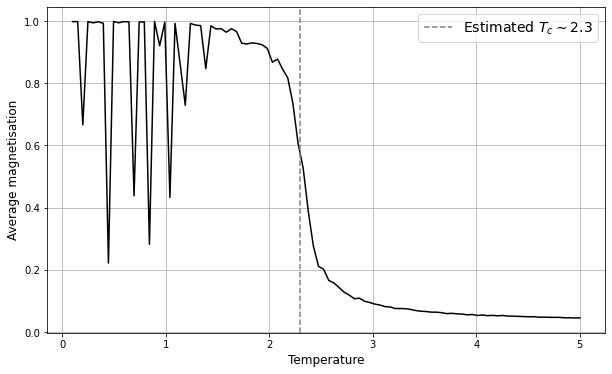

In [19]:
M_mean = np.mean(np.abs(M), axis=1)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(temperature, M_mean, '-', c='black')
plt.xlabel('Temperature', size=12)
plt.ylabel('Average magnetisation', size=12)
plt.axvline(2.3, ls='--', c='grey', label='Estimated $T_c\sim2.3$')
plt.legend(prop={'size':14})

In [20]:
np.shape()

TypeError: _shape_dispatcher() missing 1 required positional argument: 'a'